## Визуализация в matplotlib и seaborn

Целью сегодняшнего семинара является знакомство с библиотеками по визуализации: matplotlib и seaborn. Вы научитесь строить простые графики

Matplotlib: 
- линейный график, 
- столбчатая диаграмма, 
- диаграмма рассеяния

Seaborn:
- box plot,
- bar plot,
- кореляционная heat map

### Matplotlib

Будем работать с датафремом инстаграм РБК Медиа

In [3]:
import pandas as pd
data = pd.read_csv('rbc_df.csv')

In [4]:
data.head()

,date,comments,likes,text,url
0,10/11/2021 16:11:33,25,1812,Переговоры — это столкновение двух и более про...,https://www.instagram.com/p/CWGgCllIUjK/
1,10/11/2021 11:10:42,327,2338,"У белорусско-польской границы мигранты, в боль...",https://www.instagram.com/p/CWF9nA6opvy/
2,09/11/2021 16:52:42,83,4252,Большинство из нас слышали про необходимость п...,https://www.instagram.com/p/CWD_9EHIf_K/
3,09/11/2021 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс,...",https://www.instagram.com/p/CWDophIN18s/
4,08/11/2021 15:45:42,44,2214,Предприниматели грядущих десятилетий будут отл...,https://www.instagram.com/p/CWBTfdnISbq/


Импорт бибилиотеки Matplotlib:

In [5]:
import matplotlib.pyplot as plt 

Давайте для начала посмотрим как выглядит объект, который создает matplotlib И разберемся, как строить в нем графики. Первый вариант создания графика - plt.plot(), которому мы просто можем передать два аргумента - что положить на ось x, а что на y. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot)

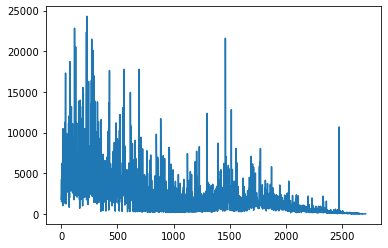

In [6]:
plt.plot(data.likes)

График представляет собой количество лайков в зависимости от наблюдения от 0 до 200

Давайте посмотрим количество лайков в зависимости от месяца

In [7]:
data['month']=data.date.str[3:5]

In [8]:
data

,date,comments,likes,text,url,month
0,10/11/2021 16:11:33,25,1812,Переговоры — это столкновение двух и более про...,https://www.instagram.com/p/CWGgCllIUjK/,11
1,10/11/2021 11:10:42,327,2338,"У белорусско-польской границы мигранты, в боль...",https://www.instagram.com/p/CWF9nA6opvy/,11
2,09/11/2021 16:52:42,83,4252,Большинство из нас слышали про необходимость п...,https://www.instagram.com/p/CWD_9EHIf_K/,11
3,09/11/2021 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс,...",https://www.instagram.com/p/CWDophIN18s/,11
4,08/11/2021 15:45:42,44,2214,Предприниматели грядущих десятилетий будут отл...,https://www.instagram.com/p/CWBTfdnISbq/,11
...,...,...,...,...,...,...
2706,21/03/2016 14:14:22,0,6,Строительство космодрома Восточный. \n\nФото: ...,https://www.instagram.com/p/BDN9F0TFF9k/,03
2707,21/03/2016 14:13:27,0,21,Отдыхающие на набержной Ялты. \n\nФото: Катери...,https://www.instagram.com/p/BDN8_EPlF9S/,03
2708,21/03/2016 14:12:37,2,16,"Уничтожение санкционных продуктов, Подмосковье...",https://www.instagram.com/p/BDN84-lFF9C/,03
2709,21/03/2016 13:58:48,0,5,Лечебно-реабилитационный центр для пожилых люд...,https://www.instagram.com/p/BDN7TsklF47/,03


Таким образом, мы создали новый столбец с месяцами в датафрейме


In [9]:
sum_likes = data.groupby("month")['likes'].apply(lambda x: x.sum())
sum_likes

month
01    346490
02    274007
03    489115
04    507057
05    706947
06    559480
07    685461
08    619522
09    603963
10    645464
11    242639
12    184950
Name: likes, dtype: int64

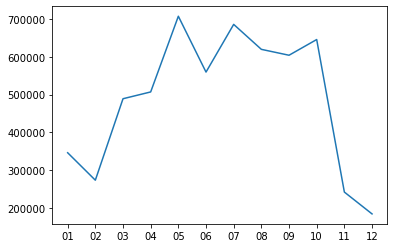

In [10]:
plt.plot(sum_likes)

Так можно видеть, какое количество лайков было в каждом месяце. Оно сильно просело в ноябре и декабре

### Задание
Постройте линейный график зависимости комментариев от года

In [11]:
### YOUR CODE HERE





Давайте посмотрим, как можно преобразовывать график 


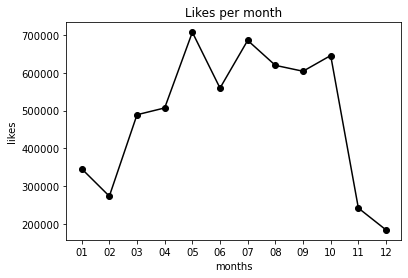

In [12]:
#меняем цвет и добавляем точки на изгибах, уже выглядит гораздо лучше
plt.plot(sum_likes, color = 'black', marker = 'o')
plt.title('Likes per month') #добавление заголовка
_ = plt.xlabel('months') #название оси икс
_ = plt.ylabel('likes') #название оси икс

# _ = ... – matplotlib выводит график и возвращает сообщение о построении графика,
# чтобы оно не появлялось, можно сохранить сообщение в дамми-переменную _

Markes на избигах могут быть любыми: '+', ',' и тд. Можно посмотреть в [документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), так же как и цвета и вообще все... 
[Список маркеров](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

Также линию на графике тоже можно делать разной. Например:

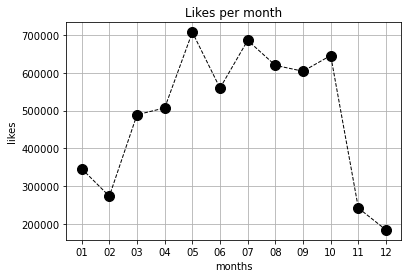

In [13]:
plt.plot(sum_likes, color = 'black', marker = 'o', linestyle='dashed', linewidth=1, markersize=10)
plt.title('Likes per month') 
_ = plt.xlabel('months') #название оси икс
_ = plt.ylabel('likes') #название оси икс
plt.grid() #можно добавить решетку на фон

Мы сделали пунктирную линию, изменили ее размер и размер маркеров. Мы посмотрели на основные методы работы с линейным графиком, в [документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) можно посмотреть примеры более сложных графиков

Далее посмотрим на диаграмму рассеяния. В отличие от линейного графика, здесь обязательно нужно задавать обе оси: x и y, поэтому в качестве оси x были вставлены значения месяцев. Как можно видеть, графиик рассеяния напоминает линейный без линии))

In [14]:
#так как дальше нужно будет задавать обе переменные:x и y, создам array, чтобы был порядок
import numpy as np
months = np.array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype=object)

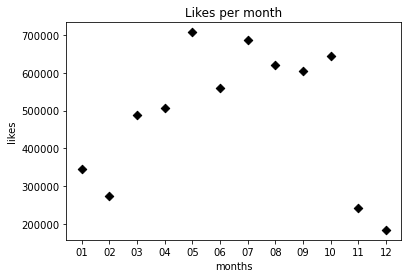

In [15]:
plt.scatter(months, sum_likes, color = 'black', marker = 'D', linewidths=1) #первая перменная - х, вторая  - у
plt.title('Likes per month')
_ = plt.xlabel('months')
_ = plt.ylabel('likes')

Здесь также можно менять маркеры и цвета. Подробнее про scatterplot в [документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

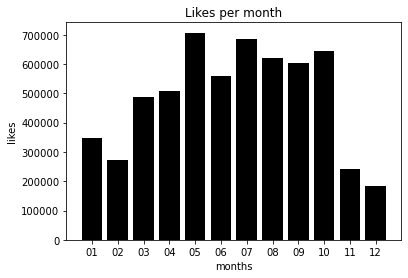

In [16]:
_ = plt.bar(months, sum_likes, color = 'black', )
plt.title('Likes per month')
_ = plt.xlabel('months')
_ = plt.ylabel('likes')

### Seaborn

In [17]:
import seaborn as sns

Начнем с построения боксплотов

Интерпретация:

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/boxplot.png?raw=true" height="400" width="700">
</center>

C:\Users\anasegorova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


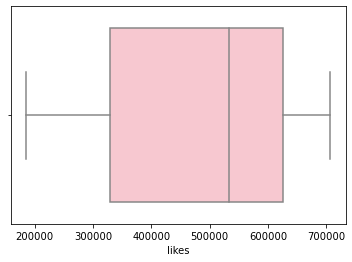

In [29]:
_ = sns.boxplot(sum_likes, color = 'pink')

Построим боксплоты по лайкам в зависимотсти от месяца:

C:\Users\anasegorova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


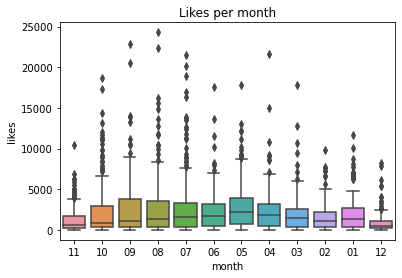

In [31]:
_ = sns.boxplot('month', 'likes', data = data)
_ = plt.title('Likes per month')

# Boxplot: 
# центральная линия = медиана
# края "ящика" = 1-ый и 3-ий квантили (25% и 75% перцентили выборки)
# усы = 1.5 * (Q3 - Q1)
# точки = выбросы

Далее перейдем к построению bar plots

`barplot` аггрегирует данные по значениям категориальной переменной и применяет определенную функцию к значениям соответствующих групп количественной переменной. По умолчанию это функция **среднее**, однако эту функцию можно изменить в параметре `estimator`

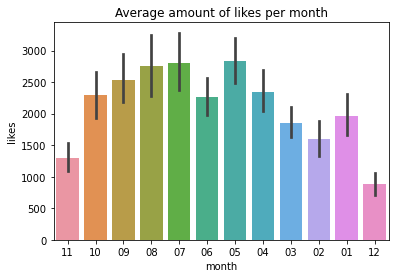

In [38]:
_ = sns.barplot(x = 'month', y = 'likes', data = data)
_ = plt.title('Average amount of likes per month')

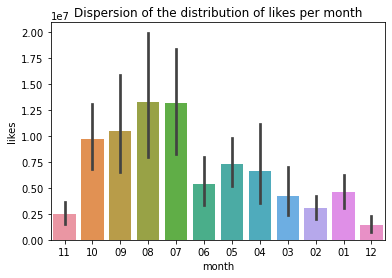

In [39]:
_ = sns.barplot(x = 'month', y = 'likes', data = data, estimator = np.var)
_ = plt.title('Dispersion of the distribution of likes per month')

Далее перейдем к построению корреляционной heat map. На нашем датасете с лайками трудно отследить корреляцию, так как у нас только две переменных

<AxesSubplot:>

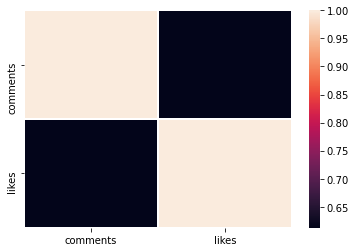

In [57]:
sns.heatmap(data.corr(), linecolor = 'white', linewidths = 1)

Поэтому используем встроенный датасет о чаевых для этого

In [46]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


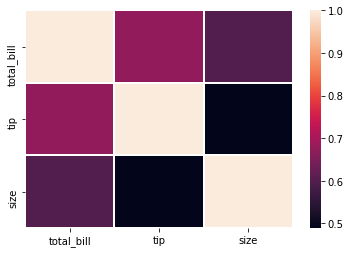

In [53]:
_ = sns.heatmap(tips.corr(), linecolor = 'white', linewidths = 1)

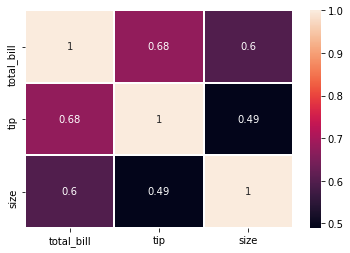

In [54]:
_ = sns.heatmap(tips.corr(),  linecolor = 'white', linewidths = 1, annot = True) #добавили значения корреляций

### Задания

1. Используя новый датасет (tips), просуммируйте итоговые суммы заказов по дням недели и постройте линейный график. Не забудьте добавить заголовок и названия осей

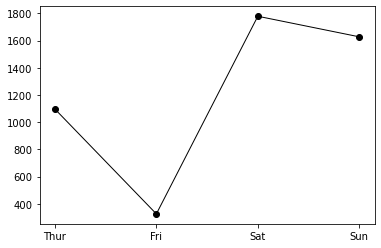

In [79]:
_ = plt.plot(tips.groupby('day')['total_bill'].apply(lambda x: x.sum()), color = 'black', linewidth = 1, marker = 'o')

2. Предположите, кто оставил больше чаевых: мужчины или женщины? Постройте столбчатую диаграмму распределения, на которой будет видно, кто оставил больше чаевых **в целом**: женщины или мужчины

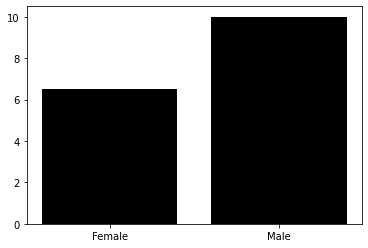

In [94]:
_ = plt.bar(tips.sex, tips.tip, color = 'black', )

3. Используя датасет tips, сначала предположите, а затем покажите на графике за какой день недели в **в среднем** оставляют больше чаевых? Используйте barplot

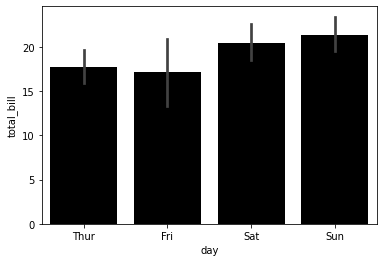

In [95]:
_ = sns.barplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

4. Сделайте то же самое, что и в предыдущем пунте, используя boxplot. Что удобнее в интерпретации: barplot или boxplot?

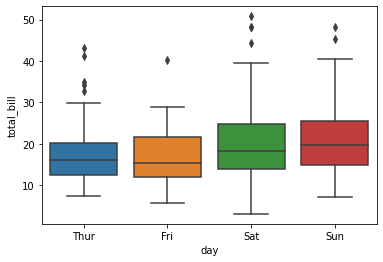

In [96]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips);